# Customer Segmentation

## Background

This dataset contains all purchases made for an online retail company based in the UK during an eight month period. We could use cluster analysis combined with RFM analysis to do a customer segmentation.

## Prepare and Explore the Data

For this experiment, we will use [this](https://www.kaggle.com/vijayuv/onlineretail) data from Kaggle platform.

In [103]:
# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

In [104]:
# df_backup = df.copy()
# df_backup.head()

In [105]:
# Load data
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [106]:
len(df)

541909

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [108]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [109]:
df.loc[df['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [110]:
#df.to_csv("Online_Retail.csv", index= False)

In [111]:
print("Total data:", len(df))

Total data: 541909


In [112]:
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [113]:
weird_data = df[(df.Quantity <= 0) |( df.UnitPrice <= 0)]

In [114]:
len(weird_data)

11805

Since we want to segment our customers, we have to make sure that `CustomerID` is not null.

In [115]:
# Check missing value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [116]:
135080 / 541909

0.249266943342886

We could see that there is missing value in `CustomerID` columns. We could remove those missing values.

In [117]:
# Remove missing value
df = df[df["CustomerID"].notna()]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Then we could do some descriptive statistic.

In [118]:
# Simple descriptive statistic
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Wait, hold on. How come the quantity is a negative number and the unit price is zero? Let's check it.

In [119]:
# Check anomaly data
quantity_zero = len(df[df["Quantity"] <= 0])
perc_quantity_zero = (len(df[df["Quantity"] <= 0]) / len(df)) * 100
unitprice_zero = len(df[df["UnitPrice"] == 0])
perc_unitprice_zero = (len(df[df["UnitPrice"] == 0]) / len(df)) * 100

print("The data consist of", str(quantity_zero), "rows of data with item quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_quantity_zero))
print("")
print("The data consist of", str(unitprice_zero), "rows of data with unit price equal to zero.")
print("About {:.2f}% of total data".format(perc_unitprice_zero))

The data consist of 8905 rows of data with item quantity less/equal than zero.
About 2.19% of total data

The data consist of 40 rows of data with unit price equal to zero.
About 0.01% of total data


Then just remove those anomaly data

In [120]:
# Remove anomaly
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


Now we're good to go. Lets do some data exploration!

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


The data contains 406829 rows and 8 columns, each row represents each item in a purchasement. The columns are:
* `InvoiceNo` - Invoice number, to identify each invoice
* `StockCode` - Stock code, to identify each item in the inventory
* `Description` - Item's description
* `Quantity` - Number of purchased item in each invoice
* `InvoiceDate` - Date of purchasement
* `UnitPrice` - Item's price per unit
* `CustomerID` - Customer's identification number
* `Country` - Customer's country of origin

In [122]:
# Check unique value
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

There are 18532 purchasements, 3665 unique item purchased, from 4338 customers that came from 37 countries.

As we seen above, there are 37 countries of customer's origin. Since the retail company is based in the UK, we could simplified the country as UK or Non UK

In [123]:
# df['Country_isUK'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non UK')

In [124]:
%%timeit
df['Country'].apply(lambda x: "UK" if x == "United Kingdom" else "Non UK")

61.4 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [125]:
%%timeit
np.where(df['Country'].values == 'United Kingdom', 'UK', 'Non UK')

15.7 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [126]:
(82.2 - 15.5)/82.2 , (1 - ((82.2 - 15.5)/82.2)) * 60

(0.8114355231143552, 11.31386861313869)

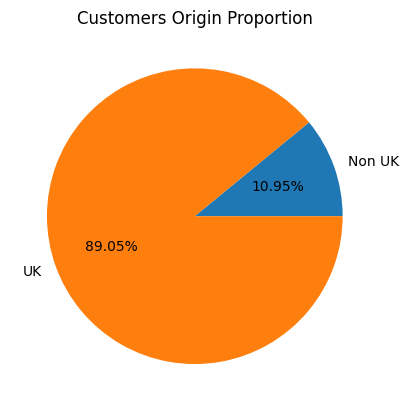

In [127]:
# Simplify country origin
df['Country_isUK'] = np.where(df['Country']=='United Kingdom', 'UK', 'Non UK')
customers_origin = df.groupby(['Country_isUK']).size()

plt.title('Customers Origin Proportion')
plt.pie(
    customers_origin,
    labels=customers_origin.index,
    autopct=lambda p: f'{p:.2f}%'
)
plt.show();

Based on the piechart, we could see that mostly our customers are from the UK.

Next, we could analyze the trend of purchasement. First, lets create `TotalAmount` column (`Quantity` * `UnitPrice`). Then, we could transform the `InvoiceDate` data type from string to date.

In [128]:
# Create new features and cast date column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34


Then plot the trendline.

In [129]:
import matplotlib.dates as mdates

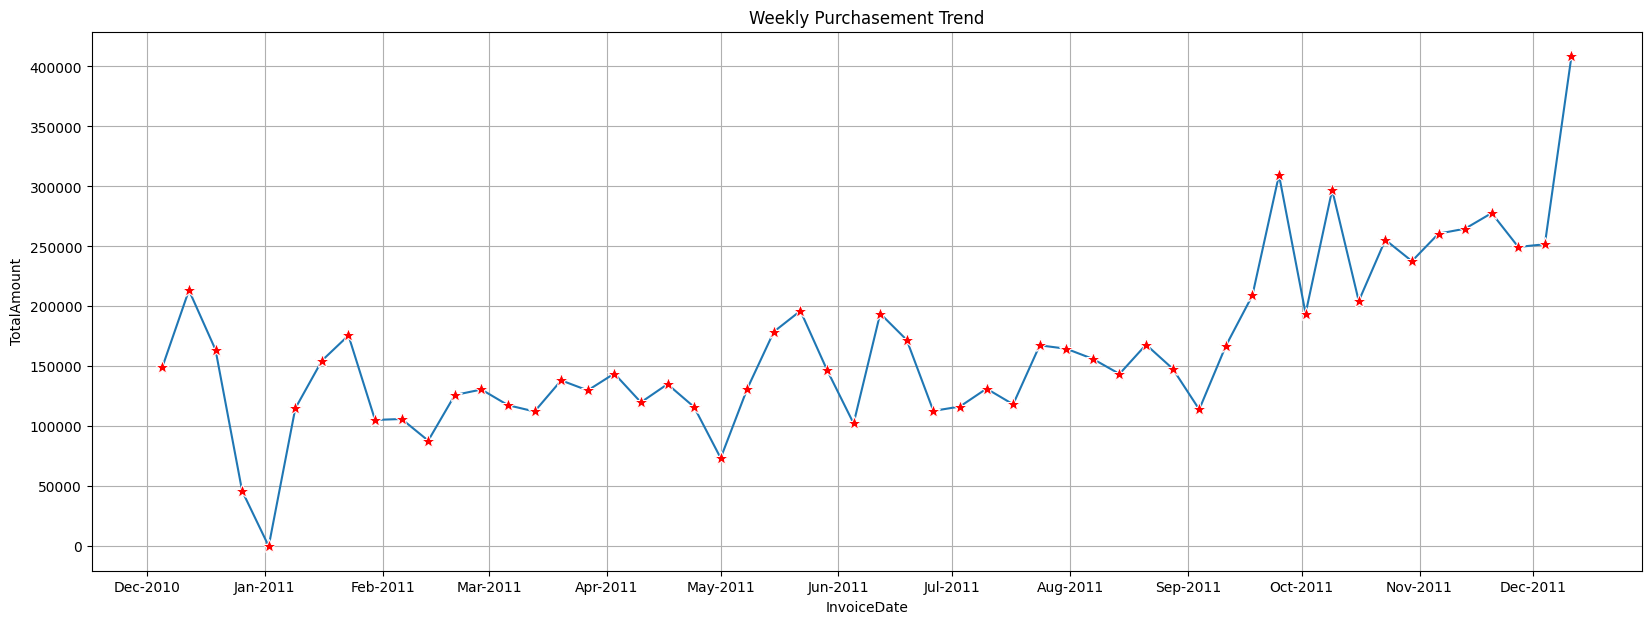

In [130]:
# Plot weekly trend
weekly_purchasements = df.copy()
weekly_purchasements = weekly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1W"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Weekly Purchasement Trend')
ax = sns.lineplot(
    x=weekly_purchasements.index,
    y=weekly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

In [131]:
weekly_purchasements

InvoiceDate
2010-12-05    149386.330
2010-12-12    213447.720
2010-12-19    163770.730
2010-12-26     46109.110
2011-01-02         0.000
2011-01-09    114865.270
2011-01-16    154714.940
2011-01-23    175757.980
2011-01-30    105288.770
2011-02-06    106095.230
2011-02-13     88015.420
2011-02-20    126050.400
2011-02-27    130687.360
2011-03-06    117600.820
2011-03-13    112338.000
2011-03-20    138278.820
2011-03-27    129918.430
2011-04-03    143977.030
2011-04-10    119961.920
2011-04-17    135142.201
2011-04-24    116090.020
2011-05-01     73474.560
2011-05-08    131329.180
2011-05-15    178850.250
2011-05-22    196269.920
2011-05-29    146976.900
2011-06-05    102371.900
2011-06-12    194019.080
2011-06-19    171940.300
2011-06-26    112818.820
2011-07-03    116479.920
2011-07-10    131383.740
2011-07-17    118297.880
2011-07-24    167519.810
2011-07-31    164667.901
2011-08-07    156185.190
2011-08-14    143652.210
2011-08-21    168080.690
2011-08-28    148051.260
2011-09-04   

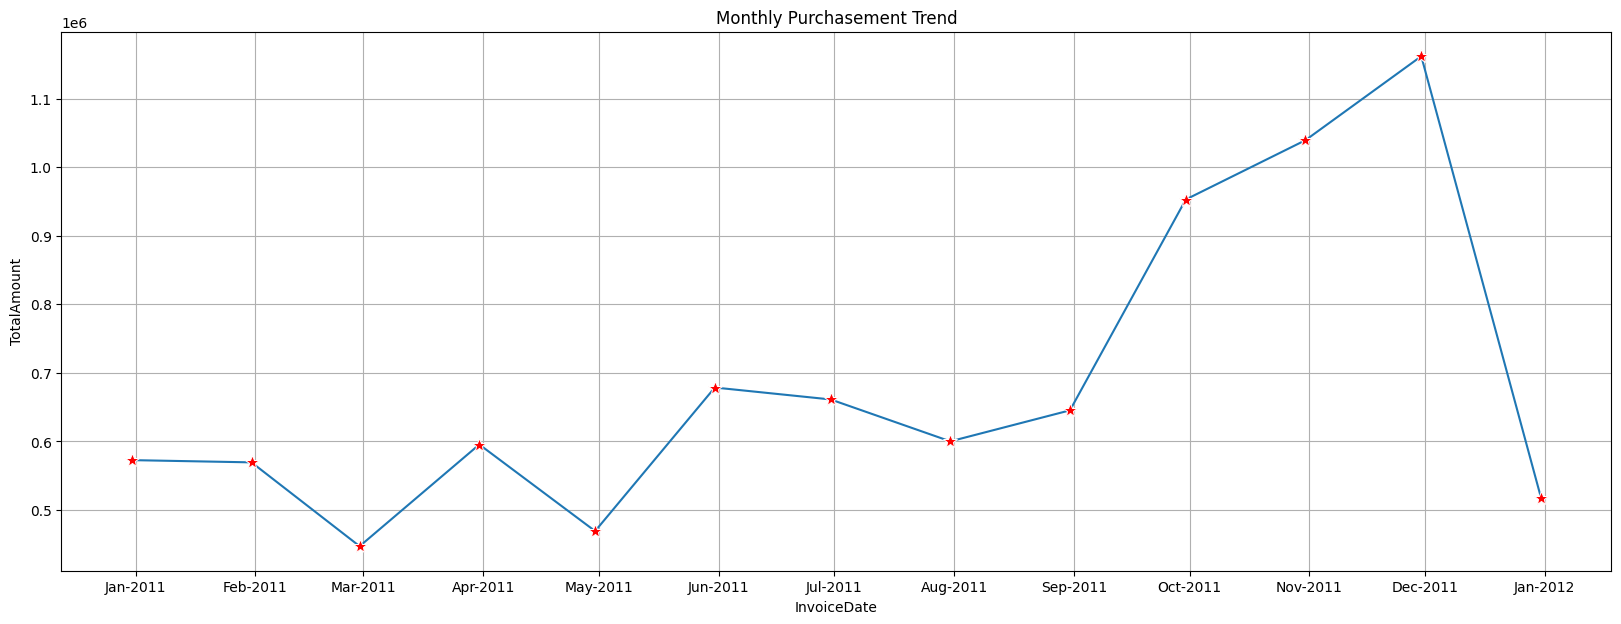

In [132]:
# Plot monthly trend
monthly_purchasements = df.copy()
monthly_purchasements = monthly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Purchasement Trend')
ax = sns.lineplot(
    x=monthly_purchasements.index,
    y=monthly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

Based on the picture above, it can be seen that there was an increase in total purchases at the end of the year.

## RFM

In this project, we would segment the customers using customer's demography and purchasement behavior. To explain the customer's demography, we could use `Country` column while to explain the customer's purchasement behavior we have to transform our data first to get those information. We could use RFM analysis to get those information.

### Recency

To measure customer's recency, we could substract the latest transaction date in the data with each customer's latest transaction.

In [133]:
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency.head(10)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
12352.0   2011-11-03 14:37:00
12353.0   2011-05-19 17:47:00
12354.0   2011-04-21 13:11:00
12355.0   2011-05-09 13:49:00
12356.0   2011-11-17 08:40:00
Name: InvoiceDate, dtype: datetime64[ns]

In [134]:
max(recency)

Timestamp('2011-12-09 12:50:00')

In [135]:
recency = max(recency) - recency
recency.head(10)

CustomerID
12346.0   325 days 02:49:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
12352.0    35 days 22:13:00
12353.0   203 days 19:03:00
12354.0   231 days 23:39:00
12355.0   213 days 23:01:00
12356.0    22 days 04:10:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [136]:
# Get customer's recency
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency = max(recency) - recency
recency = recency.dt.days
recency = recency.rename('Recency')

recency.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Recency, dtype: int64

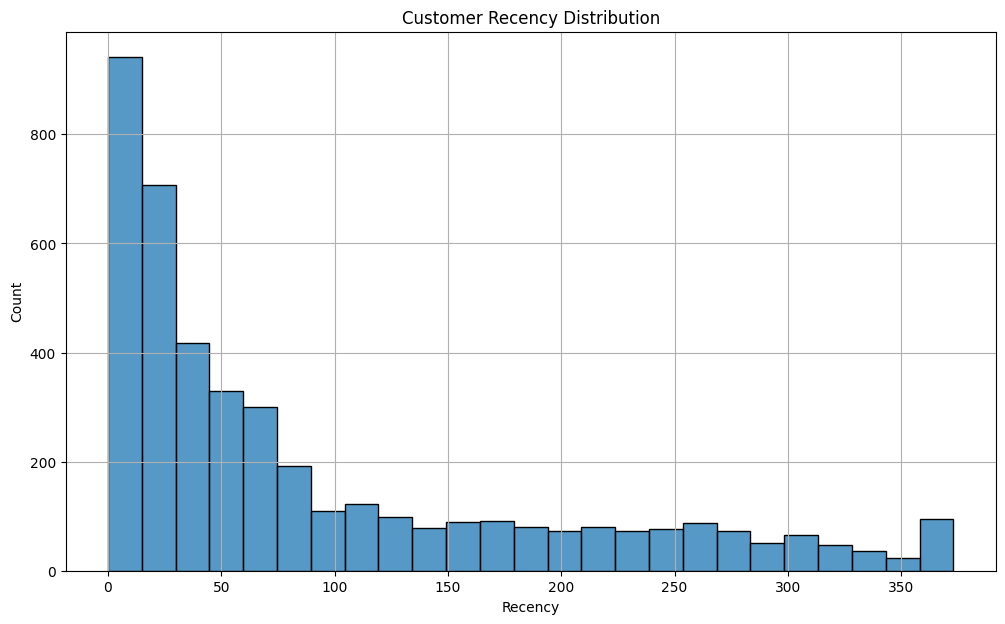

In [137]:
# Recency histogram plot
plt.figure(figsize=(12, 7))
sns.histplot(recency)
plt.title('Customer Recency Distribution')
plt.grid()
plt.show()

### Frequency

To measure customer's frequency, we could count customer's invoice.

In [138]:
# Count frequency
frequency = df.groupby(['CustomerID'])['InvoiceNo'].count()
frequency = frequency.rename('Frequency')
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

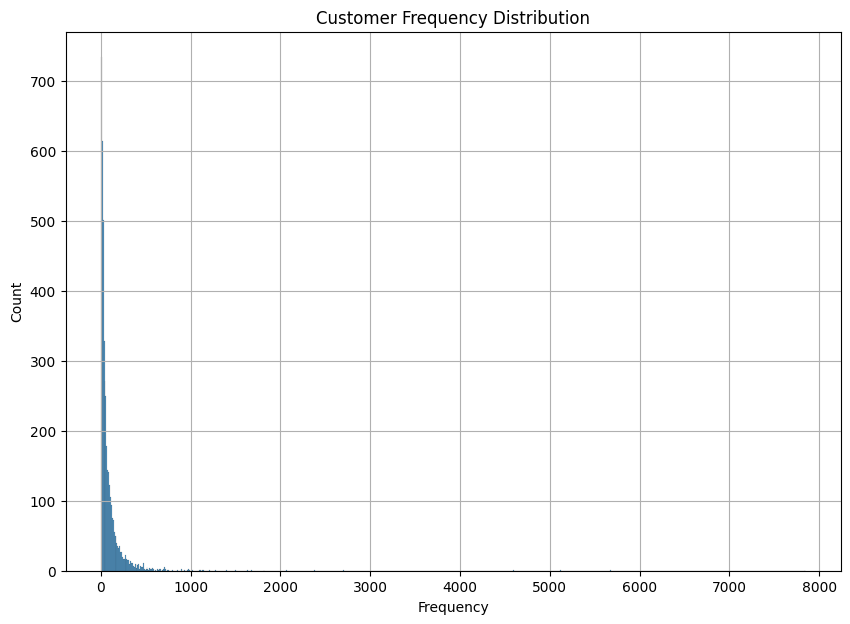

In [139]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency)
plt.grid()
plt.show();

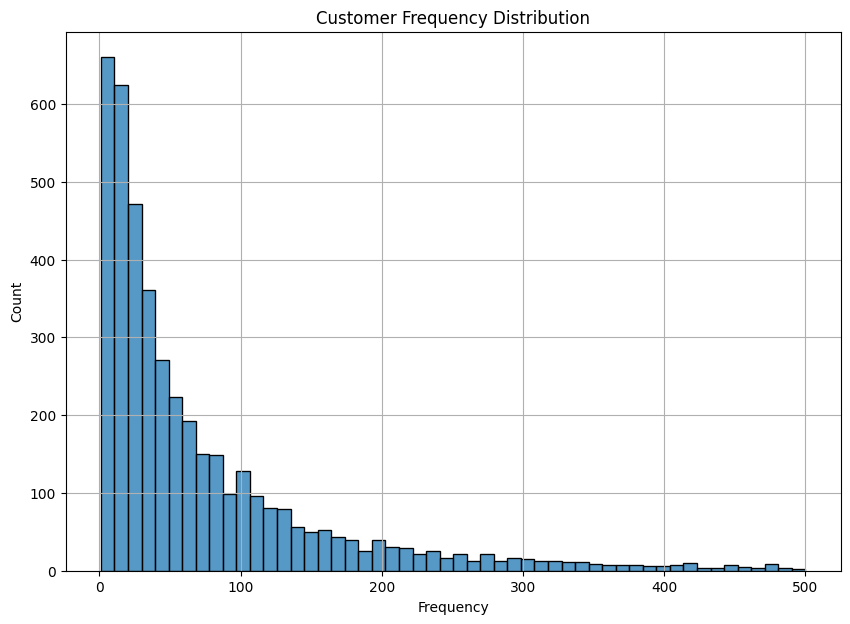

In [140]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency[frequency <= 500])
plt.grid()
plt.show();

Text(0.5, 1.0, 'Frequency <= 500')

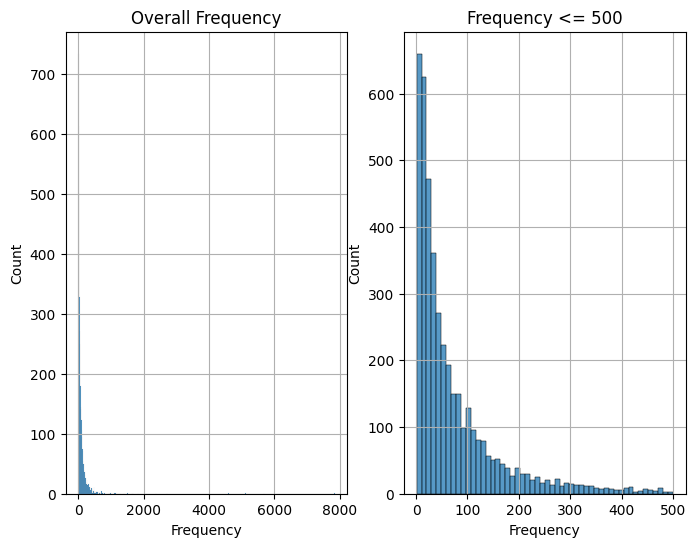

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(frequency, ax=axs[0])
sns.histplot(frequency[frequency <= 500], ax=axs[1])

axs[0].grid()
axs[0].set_title('Overall Frequency')

axs[1].grid()
axs[1].set_title('Frequency <= 500')

In [142]:
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

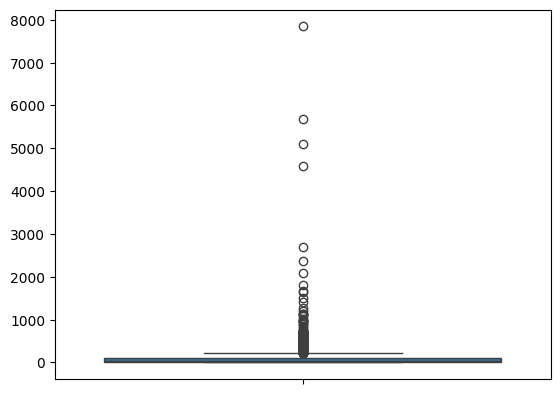

In [143]:
sns.boxplot(frequency.values);

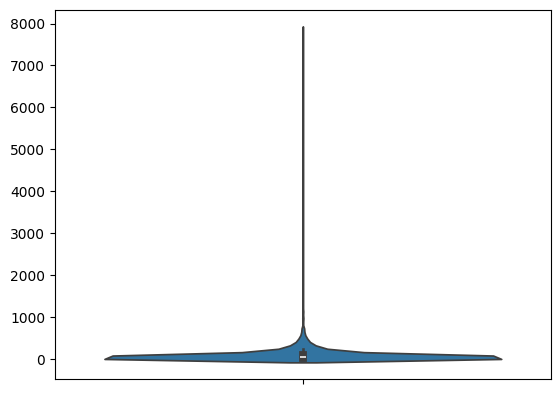

In [144]:
sns.violinplot(frequency.values);

### Monetary

To measure customer's monetary, we could sum the customer's total purchasements.

In [145]:
# Sum the money spent
monetary = df.groupby(['CustomerID'])['TotalAmount'].sum()
monetary = monetary.rename('Monetary')
monetary.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Monetary, dtype: float64

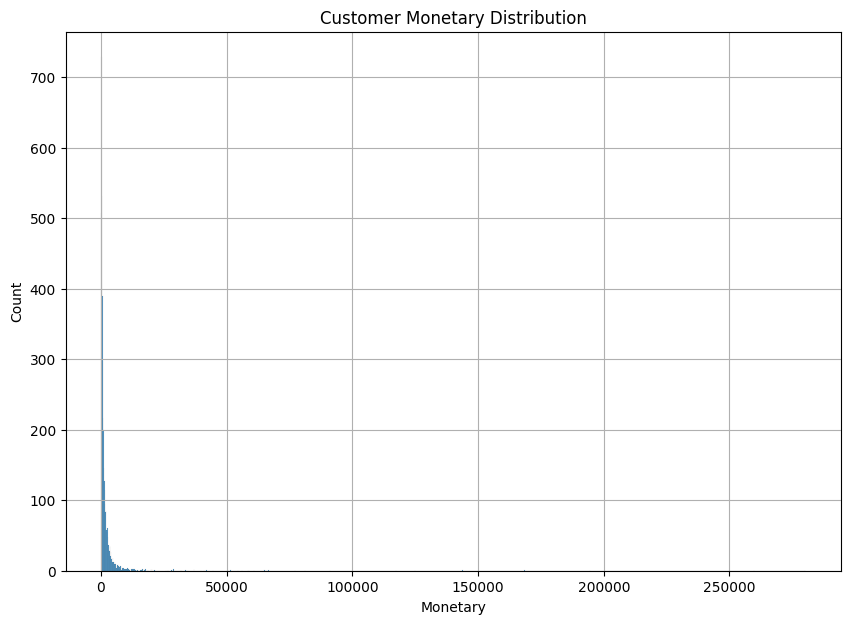

In [146]:
# Monetary histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary)
plt.grid()
plt.show()

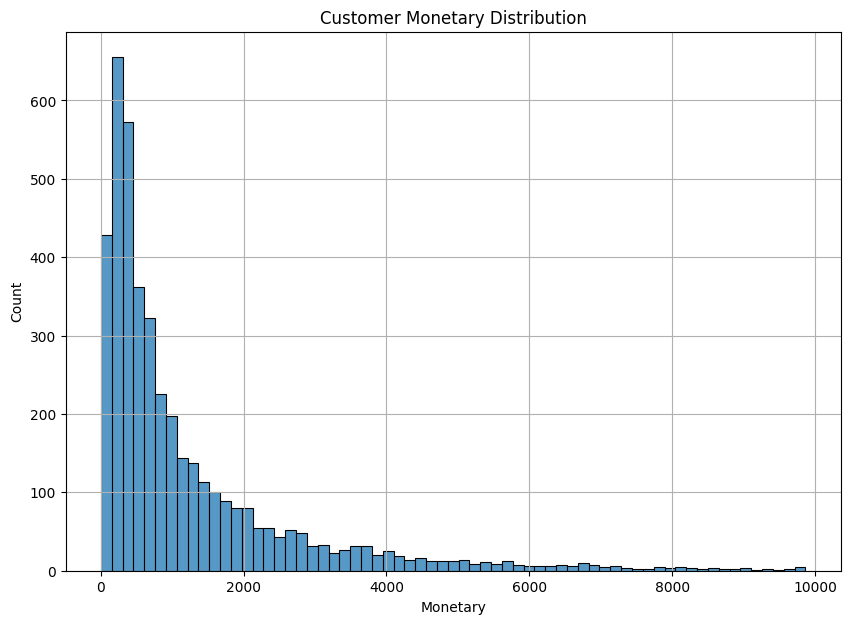

In [147]:
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary[monetary < 10000])
plt.grid()
plt.show()

### Merge the Data

The data could be separated into two dataframes. The first dataframe (log transformed data) supposed to be used when modeling and the second one (without log transformation) could be used when visualize the result.

In [148]:
(
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
    .head()
)

,CustomerID,Country_isUK
0,12346.0,UK
1,12347.0,Non UK
2,12348.0,Non UK
3,12349.0,Non UK
4,12350.0,Non UK


In [149]:
df.groupby(['CustomerID', 'Country_isUK']).size().head(5)

CustomerID  Country_isUK
12346.0     UK                1
12347.0     Non UK          182
12348.0     Non UK           31
12349.0     Non UK           73
12350.0     Non UK           17
dtype: int64

In [150]:
# Get customer's country of origin
country = (
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

# Merge the data
df_new = (
    country
    .merge(recency, on='CustomerID')
    .merge(frequency, on='CustomerID')
    .merge(monetary, on='CustomerID')
)

# Set CustomerID as index
df_new = df_new.set_index('CustomerID')
df_new.head(20)

,Country_isUK,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,UK,325,1,77183.60
12347.0,Non UK,1,182,4310.00
12348.0,Non UK,74,31,1797.24
12349.0,Non UK,18,73,1757.55
12350.0,Non UK,309,17,334.40
12352.0,Non UK,35,85,2506.04
12353.0,Non UK,203,4,89.00
12354.0,Non UK,231,58,1079.40
12355.0,Non UK,213,13,459.40


### One Hot Encoding

Since our model could just accept the numeric value, we have to recode the non numeric column.

In [151]:
# Recode the non numeric variable

df_new = pd.get_dummies(
    df_new,
    columns=['Country_isUK'],
    drop_first=True
)

df_new = df_new.rename(
    columns={'Country_isUK_UK': 'Country_UK'}
)

df_new.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,325,1,77183.60,True
12347.0,1,182,4310.00,False
12348.0,74,31,1797.24,False
12349.0,18,73,1757.55,False
12350.0,309,17,334.40,False


### Scaling

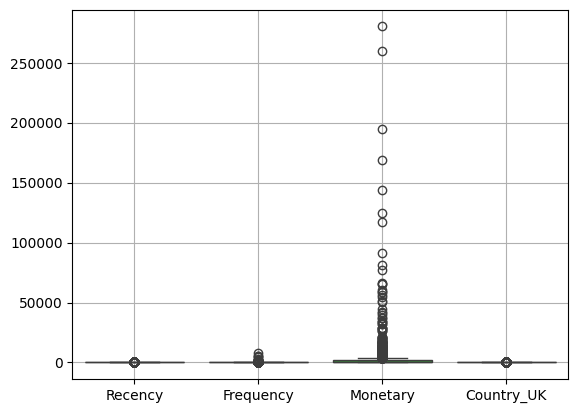

In [152]:
sns.boxplot(data=df_new)
plt.grid()
plt.show()

As we could see, there are variation of range in each column. We have to standardize it first.

In [153]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(
    df_scaled,
    columns=df_new.columns,
    index=df_new.index
)

df_scaled.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,2.334574,-0.396578,8.358668,0.326547
12347.0,-0.905340,0.394649,0.250966,-3.062350
12348.0,-0.175360,-0.265435,-0.028596,-3.062350
12349.0,-0.735345,-0.081836,-0.033012,-3.062350
12350.0,2.174578,-0.326635,-0.191347,-3.062350


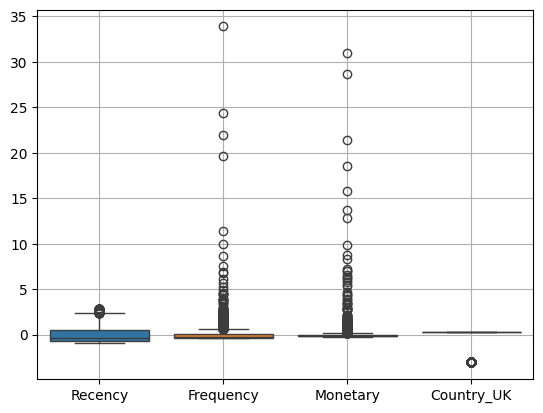

In [154]:
# Plot scaled data
sns.boxplot(data=df_scaled)
plt.grid()
plt.show()

## Modeling

In [155]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [156]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

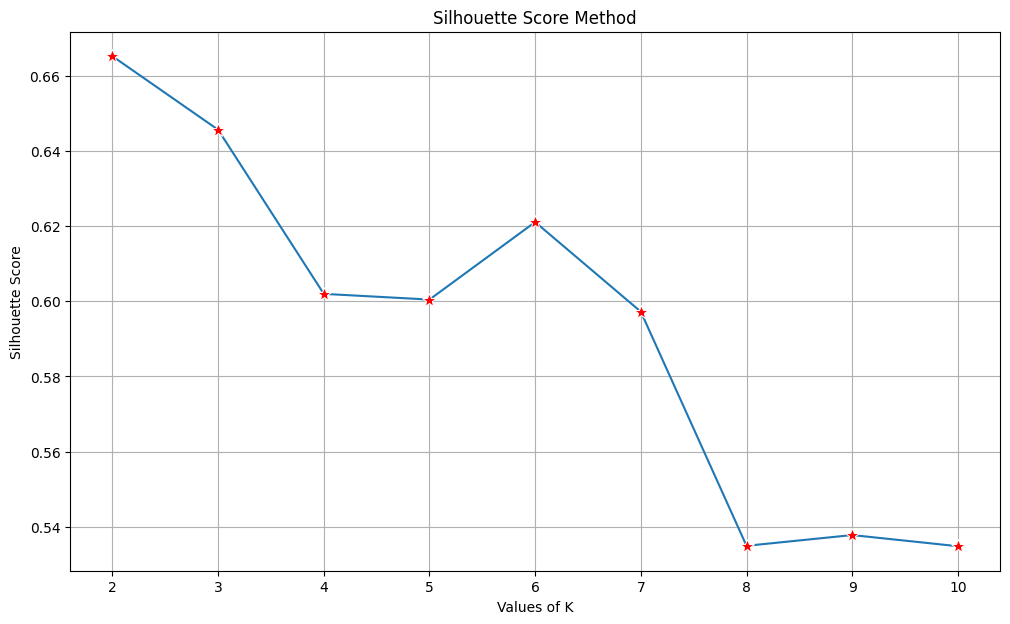

In [157]:
# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

Using silhouette score, the best K is either 2 or 6

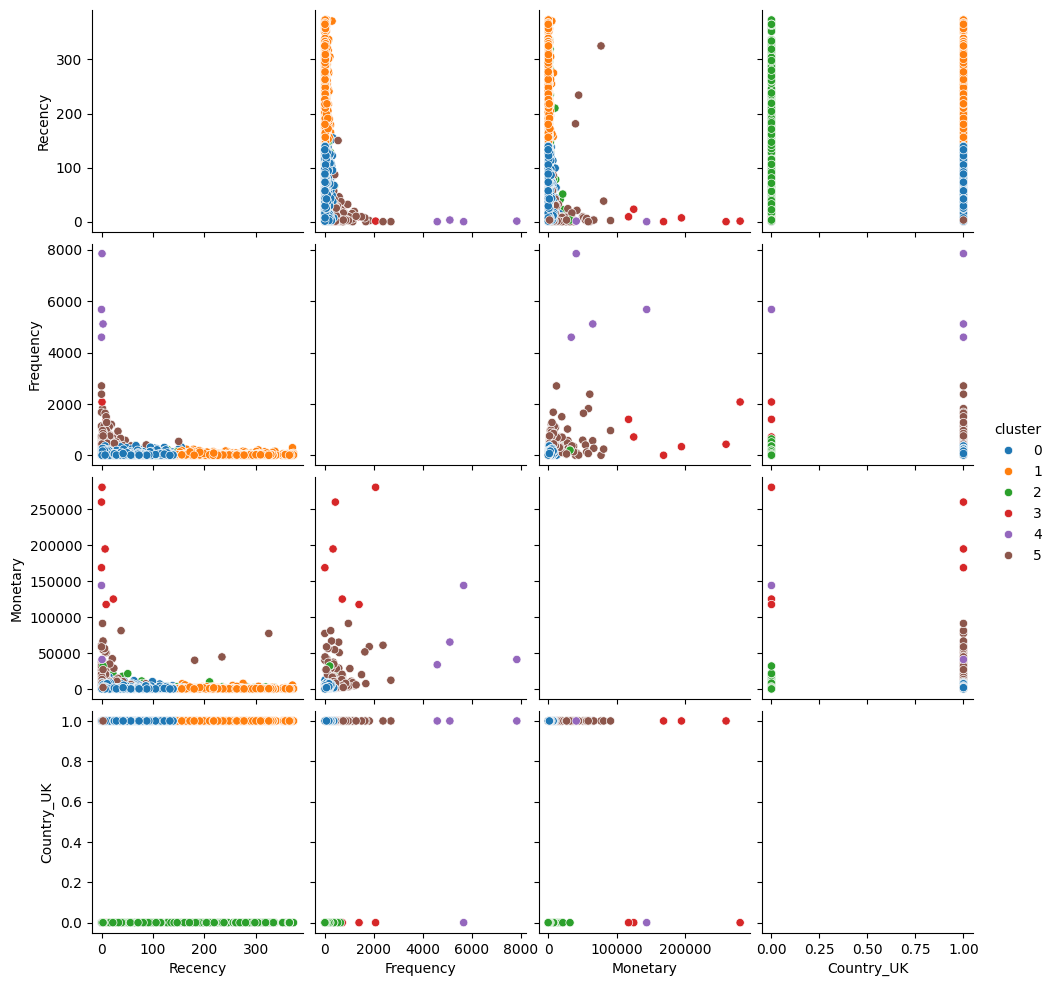

In [158]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(df_scaled)

df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [159]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .drop("Country_UK", axis = 1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                      0            1             2              3  \
Recency   mean       42.676884   246.776618     95.405797       6.666667   
          std        36.313016    65.636727    104.638705       8.869423   
          min         0.000000   143.000000      0.000000       0.000000   
          q25        14.000000   189.000000     18.000000       0.250000   
          median     31.000000   242.000000     52.000000       4.000000   
          q75        64.000000   296.000000    136.500000       8.500000   
          max       155.000000   373.000000    373.000000      23.000000   
Frequency mean       76.270826    27.689979     81.396135     826.833333   
          std        74.030983    32.176026     96.304061     771.620481   
          min         1.000000     1.000000      1.000000       3.000000   
          q25        22.000000     8.250000     21.250000     360.500000   
          median     51.000000    18.000000     45.000000     572.500000   
          q75       107.000000    33.000000    101.000000    1228.500000   
          max       385.000000   297.000000    638.000000    2076.000000   
Monetary  mean     1341.293935   450.793070   2262.538913  190863.461667   
          std      1592.871914   610.367153   3479.689136   67791.993010   
          min         6.200000     3.750000     51.560000  117379.630000   
          q25       371.700000   163.225000    459.650000  135804.022500   
          median    795.120000   305.515000   1025.700000  181511.645000   
          q75      1720.300000   505.542500   2659.962500  243380.672500   
          max     17654.540000  7832.470000  31906.820000  280206.020000   

cluster                       4             5  
Recency   mean         1.000000     15.234973  
          std          1.414214     35.305176  
          min          0.000000      0.000000  
          q25          0.000000      2.000000  
          median       0.500000      6.000000  
          q75          1.500000     16.000000  
          max          3.000000    325.000000  
Frequency mean      5807.000000    535.360656  
          std       1429.730044    358.078267  
          min       4595.000000      1.000000  
          q25       4982.000000    367.000000  
          median    5393.000000    450.000000  
          q75       6218.000000    589.500000  
          max       7847.000000   2700.000000  
Monetary  mean     70925.287500  13085.065738  
          std      50424.336433  16313.461152  
          min      33719.730000   1093.650000  
          q25      39173.610000   4014.945000  
          median   53078.180000   6923.130000  
          q75      84829.857500  13213.210000  
          max     143825.060000  91062.380000

In [160]:
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster
CustomerID,,,,,
12346.0,325,1,77183.60,True,5
12347.0,1,182,4310.00,False,2
12348.0,74,31,1797.24,False,2
12349.0,18,73,1757.55,False,2
12350.0,309,17,334.40,False,2
12352.0,35,85,2506.04,False,2
12353.0,203,4,89.00,False,2
12354.0,231,58,1079.40,False,2
12355.0,213,13,459.40,False,2


In [161]:
df.CustomerID.nunique()

4338

In [162]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Recency"].count()

cluster  Country_UK
0        True          2773
1        True           958
2        False          414
3        False            3
         True             3
4        False            1
         True             3
5        True           183
Name: Recency, dtype: int64

In [163]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Frequency"].count()

cluster  Country_UK
0        True          2773
1        True           958
2        False          414
3        False            3
         True             3
4        False            1
         True             3
5        True           183
Name: Frequency, dtype: int64

That's it! The customer's behavior really segmented by their country of origin.

What if we separate the customer by its country of origin before doing cluster analysis?

In [164]:
df_result_kmeans.Recency.quantile([0.25, 0.5, 0.75])

0.25     17.0
0.50     50.0
0.75    141.0
Name: Recency, dtype: float64

In [165]:
def rqs(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

df_result_kmeans["Recency_Quality"] = df_result_kmeans['Recency'].apply(rqs)
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
CustomerID,,,,,,
12346.0,325,1,77183.60,True,5,Bad_R
12347.0,1,182,4310.00,False,2,High_R
12348.0,74,31,1797.24,False,2,Low_R
12349.0,18,73,1757.55,False,2,Medium_R
12350.0,309,17,334.40,False,2,Bad_R
12352.0,35,85,2506.04,False,2,Medium_R
12353.0,203,4,89.00,False,2,Bad_R
12354.0,231,58,1079.40,False,2,Bad_R
12355.0,213,13,459.40,False,2,Bad_R


from matplotlib import pyplot as plt
_df_0['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Country_UK').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Recency_Quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Monetary', y='cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['cluster'].plot(kind='line', figsize=(8, 4), title='cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Recency_Quality'].value_counts()
    for x_label, grp in _df_13.groupby('Country_UK')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country_UK')
_ = plt.ylabel('Recency_Quality')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Country_UK'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Recency', y='Country_UK', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Recency_Quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Recency', y='Recency_Quality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Country_UK'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Frequency', y='Country_UK', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Recency_Quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Frequency', y='Recency_Quality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Question

1. (30 point) Lakukan EDA lebih mendalam dari data yang tersedia. Misalnya: a) Siapa top 5 customer dengan pembelian terbanyak? b) Kapan waktu pembelian dengan jumlah customer terbanyak? (Misal hari apa, jam berapa, bulan apa, minggu ke berapa, dst). EDA juga bisa dilakukan menggunakan business question lain.
2. (30 point) Apa karakteristik/ciri utama dari masing-masing cluster? Apa promo yang kira-kira cocok untuk diberikan ke masing-masing cluster?
3. (40 point) Bagaimana jika segmentation difokuskan untuk customer di luar UK? Apakah terdapat insight yang menarik? Apa karakteristik utama dari cluster-cluster non UK?

# NO 1: (30 point) Lakukan EDA lebih mendalam


In [175]:
#1.  Top 5 customer dengan pembelian terbanyak
top_5_customers = df.groupby('CustomerID')['TotalAmount'].sum().nlargest(5)
print(top_5_customers)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: TotalAmount, dtype: float64


In [176]:
#2.  Waktu pembelian dengan jumlah customer terbanyak
top_purchase_time = df.groupby(df['InvoiceDate'].dt.hour)['CustomerID'].count().idxmax()
print("Jam dengan jumlah pembelian terbanyak:", top_purchase_time)

top_purchase_day = df.groupby(df['InvoiceDate'].dt.day_name())['CustomerID'].count().idxmax()
print("Hari dengan jumlah pembelian terbanyak:", top_purchase_day)

top_purchase_month = df.groupby(df['InvoiceDate'].dt.month)['CustomerID'].count().idxmax()
print("Bulan dengan jumlah pembelian terbanyak:", top_purchase_month)


Jam dengan jumlah pembelian terbanyak: 12
Hari dengan jumlah pembelian terbanyak: Thursday
Bulan dengan jumlah pembelian terbanyak: 11


In [177]:
#3. Produk yang paling sering dibeli
top_5_popular_products = df['Description'].value_counts().head(5)
print("\nTop 5 Most Popular Products:")
print(top_5_popular_products)


Top 5 Most Popular Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
Name: count, dtype: int64


In [178]:
#4. Korelasi antara jumlah item yang dibeli dan harga total transaksi
correlation = df['Quantity'].corr(df['TotalAmount'])
print("\nCorrelation between Quantity and Total Amount:", correlation)


Correlation between Quantity and Total Amount: 0.9143874178501632


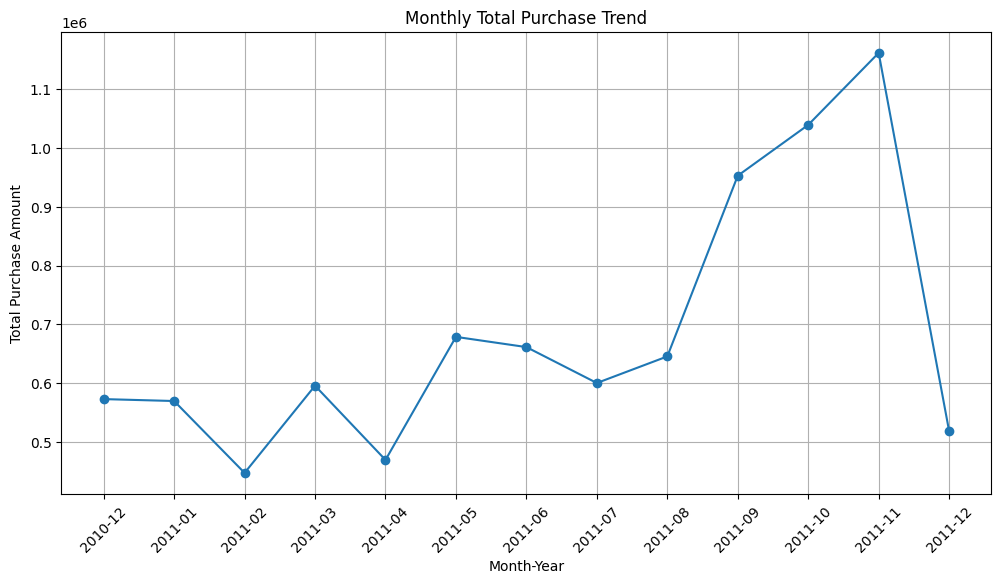

In [179]:
#5. Tren pembelian dari waktu ke waktu
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M')
monthly_total_purchase = df.groupby('Month_Year')['TotalAmount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_purchase.index.astype(str), monthly_total_purchase.values, marker='o')
plt.title('Monthly Total Purchase Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [180]:
#6. Distribusi Total Pembelian per Negara:
country_total_purchase = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
print(country_total_purchase)


Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [181]:
#7. Distribusi Waktu Pembelian sepanjang hari:
df['Hour'] = df['InvoiceDate'].dt.hour
purchase_distribution_by_hour = df.groupby('Hour')['InvoiceNo'].count()
purchase_distribution_by_hour

Hour
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: InvoiceNo, dtype: int64

# NO 2:(30 point) Apa karakteristik/ciri utama dari masing-masing cluster? Apa promo yang kira-kira cocok untuk diberikan ke masing-masing cluster?

### Karakteristik Cluster dan Promosi yang Sesuai
| Cluster | Recency (mean) | Frequency (mean) | Monetary (mean) |
|---------|----------------|------------------|-----------------|
| 0       | 42.68          | 76.27            | 1341.29         |
| 1       | 246.78         | 27.69            | 450.79          |
| 2       | 95.41          | 81.40            | 2262.54         |
| 3       | 6.67           | 826.83           | 190863.46       |
| 4       | 1.00           | 5807.00          | 70925.29        |
| 5       | 15.23          | 535.36           | 13085.07        |

### Karakteristik Utama dari Masing-Masing Cluster:

#### Cluster 0:
- **Recency:**
  - Rata-rata: 42.68
  - Frekuensi pembelian dan nilai Moneter berada di tengah-tengah.
- **Deskripsi:**
  - Relatif baru-baru ini melakukan pembelian.
  - Pelanggan dengan pembelian stabil namun tidak terlalu besar.

#### Cluster 1:
- **Recency:**
  - Rata-rata: 246.78
  - Frekuensi pembelian dan nilai Moneter cenderung rendah.
- **Deskripsi:**
  - Sudah lama tidak melakukan pembelian.
  - Mungkin tidak aktif dalam berbelanja atau lebih memilih pembelian besar secara jarang.

#### Cluster 2:
- **Recency:**
  - Rata-rata: 95.41
  - Frekuensi pembelian dan nilai Moneter sedikit lebih tinggi daripada Cluster 0.
- **Deskripsi:**
  - Relatif baru-baru ini melakukan pembelian.
  - Pembelian lebih aktif dibandingkan Cluster 0.

#### Cluster 3:
- **Recency:**
  - Rata-rata: 6.67
  - Frekuensi pembelian dan nilai Moneter sangat tinggi.
- **Deskripsi:**
  - Baru-baru ini melakukan pembelian.
  - Pelanggan yang sangat aktif dan berbelanja dengan nilai yang besar.

#### Cluster 4:
- **Recency:**
  - Rata-rata: 1.00
  - Frekuensi pembelian dan nilai Moneter sangat tinggi.
- **Deskripsi:**
  - Baru-baru ini melakukan pembelian.
  - Pelanggan yang sangat aktif dan cenderung melakukan pembelian dalam jumlah besar.

#### Cluster 5:
- **Recency:**
  - Nilai di antara Cluster 0 dan Cluster 2.
  - Frekuensi pembelian dan nilai Moneter cenderung rendah.
- **Deskripsi:**
  - Tidak terlalu aktif dalam berbelanja atau hanya melakukan pembelian kecil secara sporadis.

### Promo yang Cocok untuk Masing-Masing Cluster Berdasarkan Karakteristiknya:

#### Cluster 0:
- Promo yang cocok: Program loyalitas dengan reward khusus untuk pembelian berulang. Misalnya, memberikan poin bonus atau diskon tambahan untuk setiap pembelian setelah pembelian pertama.

#### Cluster 1:
- Promo yang cocok: Diskon untuk pembelian besar atau paket bundling produk dengan harga spesial. Misalnya, memberikan diskon khusus untuk pembelian di atas nilai tertentu atau menawarkan paket produk dengan harga yang lebih murah.

#### Cluster 2:
- Promo yang cocok: Diskon atau penawaran khusus untuk mendorong pembelian lebih lanjut. Misalnya, memberikan diskon tambahan untuk pembelian berikutnya setelah pembelian pertama atau menawarkan produk tambahan dengan harga spesial.

#### Cluster 3:
- Promo yang cocok: Diskon tambahan untuk produk-produk dengan harga terjangkau. Misalnya, memberikan diskon tambahan untuk produk-produk dengan harga di bawah rata-rata atau menawarkan paket produk dengan harga yang lebih terjangkau.

#### Cluster 4:
- Promo yang cocok: Program loyalitas dengan reward khusus untuk pembelian besar. Misalnya, memberikan poin bonus atau diskon tambahan untuk setiap pembelian di atas nilai tertentu.

#### Cluster 5:
- Promo yang cocok: Diskon atau penawaran khusus untuk memikat pelanggan baru atau meningkatkan keterlibatan. Misalnya, memberikan diskon untuk pembelian pertama atau menawarkan produk eksklusif dengan harga spesial kepada pelanggan yang jarang berbelanja.


# NO 3: (40 point) Bagaimana jika segmentation difokuskan untuk customer di luar UK? Apakah terdapat insight yang menarik? Apa karakteristik utama dari cluster-cluster non UK?

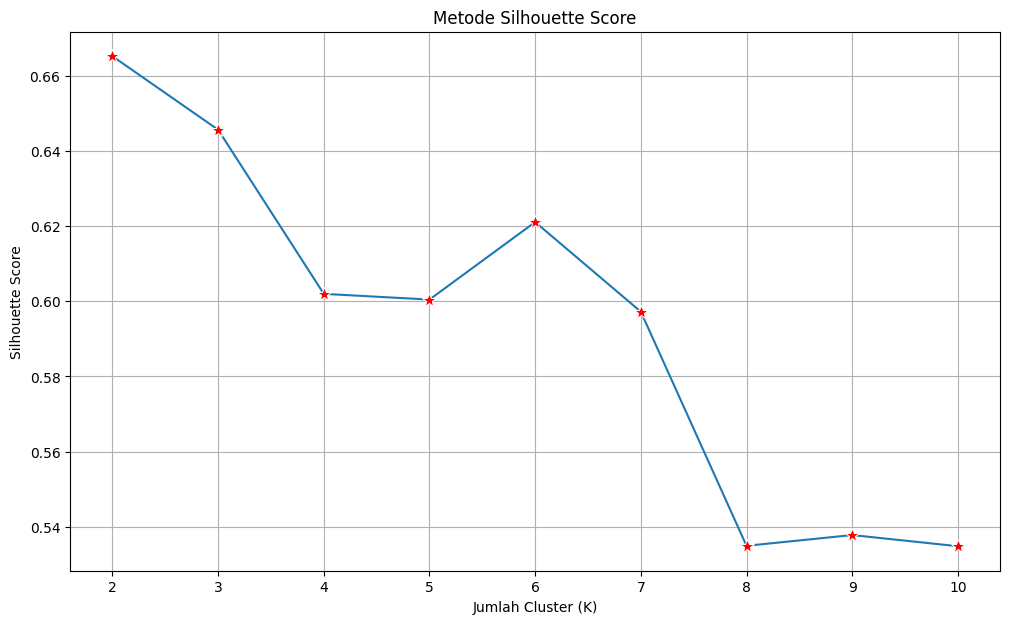

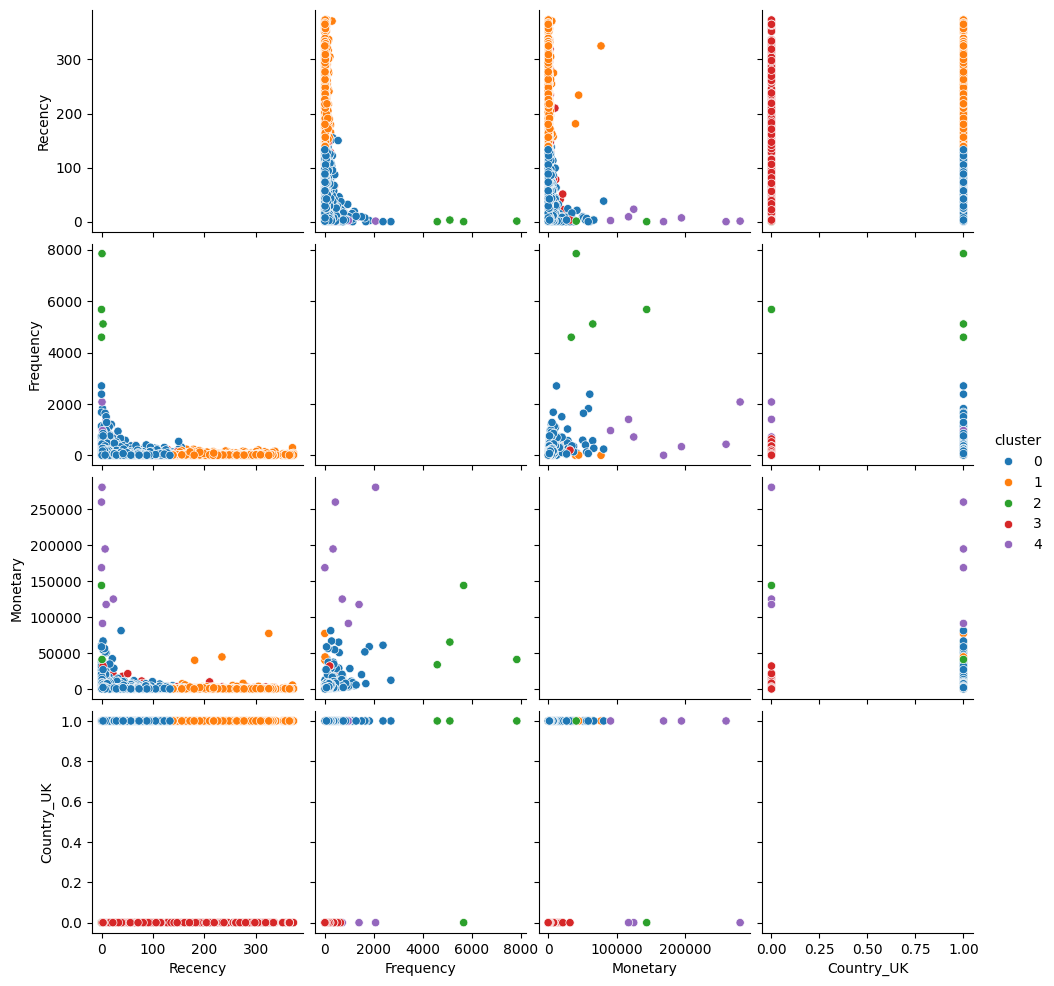

cluster                      0             1              2             3  \
Recency   mean       39.890636    243.992908       1.000000     95.405797   
          std        35.121323     66.925490       1.414214    104.638705   
          min         0.000000    137.000000       0.000000      0.000000   
          q25        11.000000    185.000000       0.000000     18.000000   
          median     29.000000    239.000000       0.500000     52.000000   
          q75        62.000000    294.500000       1.500000    136.500000   
          max       155.000000    373.000000       3.000000    373.000000   
Frequency mean      105.163021     27.686930    5807.000000     81.396135   
          std       158.817398     32.069022    1429.730044     96.304061   
          min         1.000000      1.000000    4595.000000      1.000000   
          q25        24.000000      8.500000    4982.000000     21.250000   
          median     56.000000     18.000000    5393.000000     45.000000   

In [182]:
# Import library yang diperlukan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocessing dan Feature Engineering telah dilakukan sebelumnya

# Melakukan segmentasi pelanggan di luar UK
# df_scaled adalah dataframe yang telah di-scaling sebelumnya

# Menentukan jumlah cluster optimal dengan menggunakan metode Silhouette Score
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

# Plot nilai Silhouette Score untuk setiap jumlah cluster
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette Score')
plt.grid()
plt.show();

# Berdasarkan nilai Silhouette Score, pilih jumlah cluster yang optimal
best_k = 5  # Misalnya, kita pilih 5 cluster

# Melakukan clustering dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(df_scaled)

# Menambahkan label cluster ke dataframe hasil clustering
df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

# Visualisasi hasil clustering menggunakan pairplot
sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)
plt.show();

# Analisis statistik deskriptif untuk setiap cluster
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

descriptive_stats = (
    df_result_kmeans
    .drop("Country_UK", axis=1)  # Drop kolom negara (non-numeric)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])  # Hitung statistik deskriptif
    .transpose()
)

print(descriptive_stats)


### Insight Menarik pada Segmentasi Pelanggan Non-UK:

1. **Perbedaan Perilaku Pembelian:**
   - Cluster-cluster pelanggan non-UK mungkin menunjukkan perilaku pembelian yang berbeda-beda, seperti:
     - Frekuensi pembelian yang tinggi atau rendah.
     - Nilai transaksi yang tinggi atau rendah.
     - Pola pembelian yang berbeda.

2. **Karakteristik Utama Cluster Non-UK:**
   - Setelah dilakukan clustering, karakteristik utama dari cluster-cluster non-UK dapat dianalisis, misalnya:
     - Beberapa cluster mungkin menunjukkan pola pembelian yang konsisten dan tinggi.
     - Ada juga cluster yang menunjukkan pola pembelian yang sporadis atau rendah.

3. **Segmentasi Demografis:**
   - Selain dari RFM, analisis segmentasi juga dapat memberikan wawasan tentang karakteristik demografis pelanggan non-UK, seperti:
     - Perbedaan dalam preferensi produk atau kebiasaan pembelian berdasarkan faktor demografis seperti usia, jenis kelamin, atau pendapatan.

4. **Rekomendasi Strategi:**
   - Berdasarkan insight yang ditemukan, perusahaan dapat menyusun strategi pemasaran yang lebih efektif untuk setiap cluster pelanggan non-UK, seperti:
     - Penggunaan promosi yang disesuaikan.
     - Program loyalitas yang diadaptasi.
     - Penawaran produk yang lebih tepat sasaran.
